<a href="https://colab.research.google.com/github/sudeep-sp/PyTorch/blob/main/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
how_we_do_it = {
     1: "data (prepare and load)",
     2: "build model",
     3: "fitting the model to data (training)",
     4: "making predictions and evaluating a model (inference)",
     5: "saving and loading a model",
     6: "putting it all together"
}
how_we_do_it

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data (preparing and loading)

data can be almost anything... in machine learning.

* excel speadsheet
* images of any kind
* videos
* Audio
* DNA
* text

Machine learning is a game of 2 parts:
1. Get data into a numberical representation.
2. Build a model to learn pattens in that numerical represntation.

To showcase this, lets create some known data using the linear regression formula.
We'll use a linear regression formula to make a straight line with known parameters

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
#create known parameters

weight = 0.7
bias =0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### splitting data into training and testing sets (one of the most important concepts in ML in general )

Lets create a training and test set with our data.

In [5]:
#create a train/test split
train_split = int(0.8 * len(X)) #80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualization

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #Are there predictions?
  if predictions is not None:
    #plot predictions in red (predictions in green color)
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  #show the legend
  plt.legend(prop={"size":14})

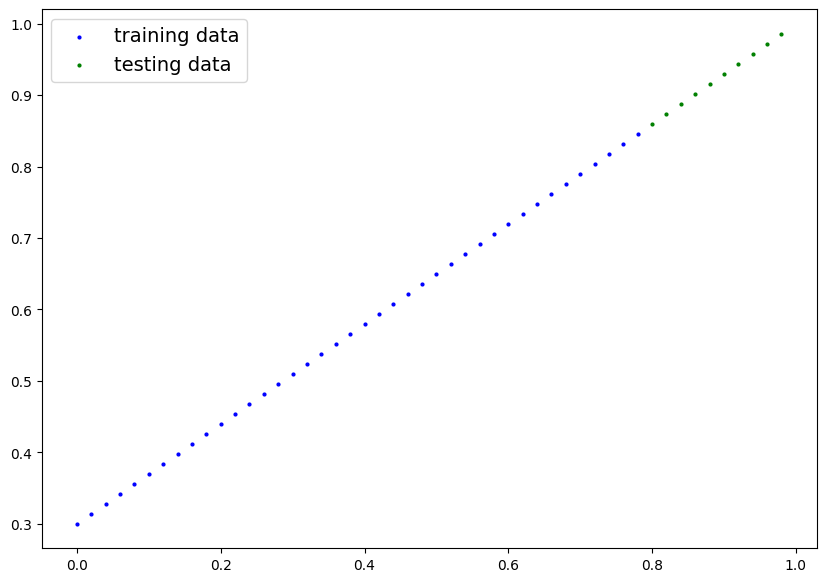

In [7]:
plot_predictions()

# Building models

what our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

1. Gradient descent
2. Backpropagation


In [8]:
from torch import nn

#create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True,
                                            dtype = torch.float
                                            ))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float
                                          ))
  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.tensor: # <- 'x' is the input data
     return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graghs (a neural network can be considered a computational graph).
* torch.nn.parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us.
* torch.nn.Model - The Base class for all NN modules, if you should overwrite forward().
* torch.optim - this where the optimizers in Pytorch live, they will help with gradent descent.
* def forward() - All nn.model subclasses require you to overwrite forward(), this method defines what happens in the forward computations.

* torch.utils.data.Dataset - Represents a map between key(label) and sample (features) pairs of your data. Such as images and thier associated labels.

* torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset(allows you to iterate ober your data).

### checking the contents of our Pytorch model

now we created a model , we see whats inside it...

so we can check our model parameter or whats inside our model using `.Parameters()`

In [9]:
#create a random seed

torch.manual_seed(42)

#create an instance of model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`
 To check our models predictive power, how will it predicts `y_test` based on `X_test`.

 when we pass data through our model, its going to run it through the forward() metod

In [12]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# you can also do something similar with torch.no_grad().
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

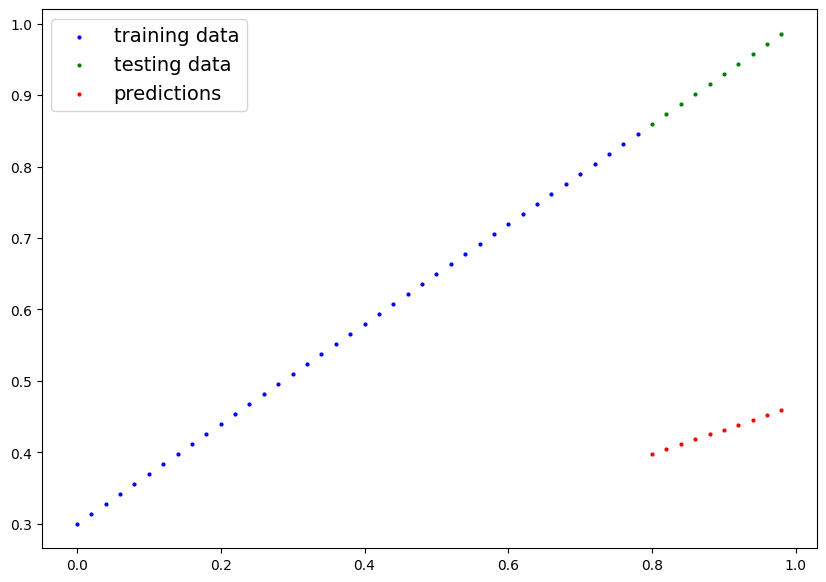

In [13]:
plot_predictions(predictions=y_preds)

## 3.Training model

The Whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models prediction are is to use a `loss function`.

Things we need to train:

* **Loss function**: https://pytorch.org/docs/stable/nn.html#loss-functions
* **Opitimizer** https://pytorch.org/docs/stable/optim.html

inside optimizer:
* `params` - the model parameters you'd like to optimze.
* `lr` - the learning rate is hyperparameter that defines how big/small the optimizer changes the parameters with each step

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer (stochastic Gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01) #lr is learning rate : its hyperparameter

# Building a training loop (and a testing loop) in PyTorch.

A couple of things we need in a training loop:
  0. loop through the data and do ...
  1. forward pass
  2. calculate the loss
  3. optimizer zero grad
  4. Loss backword
  5. optimizer step

In [57]:
#An epoch is one loop through the data... (this is a hyperparameter)
epochs = 100

#0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gardients

  # 1. Forward pass
  y_pred = model_0(X_train)

  #2. calculate Loss
  loss = loss_fn(y_pred, y_train)


  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  # 5. set the optimizer (perform gradient descent)
  optimizer.step() ## by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  #Testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():## turns off grad tracking and a couple more things behind the scenes
    #1. do the forward pass
    test_pred = model_0(X_test)

    #2 . calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
   print(f'Epoch:{epoch} | Loss:{loss} | Test loss: {test_loss}')
   print(model_0.state_dict())

Epoch:0 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:10 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:20 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:30 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:40 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:50 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch:60 | Loss:0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor

In [59]:
weight, bias

(0.7, 0.3)

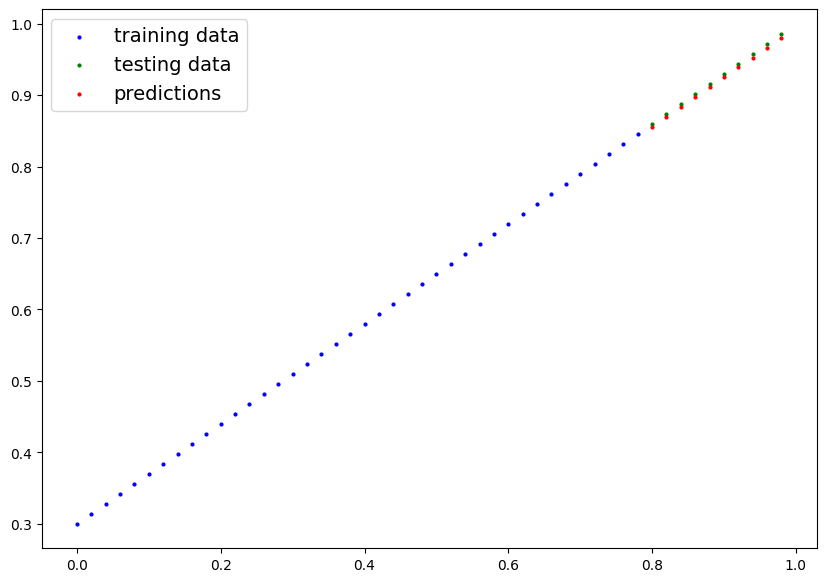

In [58]:
plot_predictions(predictions=test_pred)